In [81]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# reading the Acoustic_Extinguisher_fire_dataset into a dataframe

df = pd.read_excel('file_csv/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')

In [83]:
#checking the head
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [84]:
#checking the number  of unique objects in the fuel column

df['FUEL'].nunique()

4

In [85]:
# checking for null values

df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [86]:
# checking the statistics of the non categorical columns

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SIZE,17442.0,3.411765,1.750977,1.0,2.0,3.0,5.0,7.0
DISTANCE,17442.0,100.000000,54.773826,10.0,50.0,100.0,150.0,190.0
DESIBEL,17442.0,96.379142,8.164096,72.0,90.0,95.0,104.0,113.0
AIRFLOW,17442.0,6.975634,4.736169,0.0,3.2,5.8,11.2,17.0
FREQUENCY,17442.0,31.611111,20.939149,1.0,14.0,27.5,47.0,75.0
STATUS,17442.0,0.497821,0.500010,0.0,0.0,0.0,1.0,1.0


In [87]:
#checking the corelation of the features with the label

df.corr()['STATUS'].sort_values()

DISTANCE    -0.644051
FREQUENCY   -0.244203
SIZE        -0.096947
DESIBEL      0.203970
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

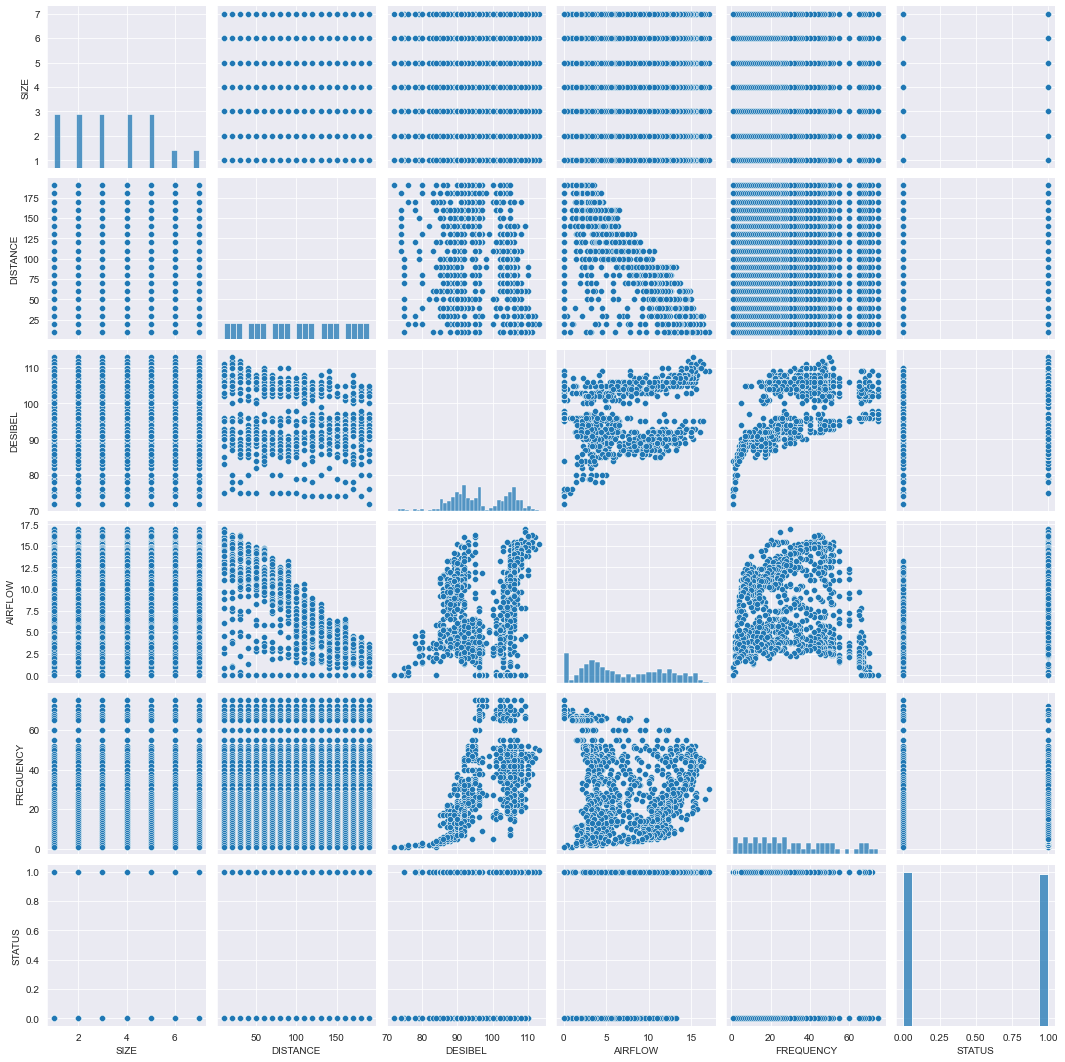

In [88]:
# creating a pairplot of the columns
sns.pairplot(df)

C:\Users\ihechukwu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AIRFLOW', ylabel='Density'>

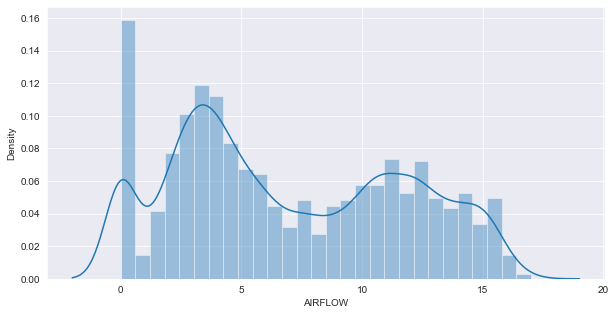

In [89]:
#checking the distribution of the airflow

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.distplot(df['AIRFLOW'])

In [90]:
# getting a dummy variable for the fuel column

dummies = pd.get_dummies(df['FUEL'], drop_first=True)

In [91]:
df = pd.concat([df, dummies], axis=1)

In [92]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,kerosene,lpg,thinner
0,1,gasoline,10,96,0.0,75,0,0,0,0
1,1,gasoline,10,96,0.0,72,1,0,0,0
2,1,gasoline,10,96,2.6,70,1,0,0,0
3,1,gasoline,10,96,3.2,68,1,0,0,0
4,1,gasoline,10,109,4.5,67,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0,0,1,0
17438,7,lpg,190,84,2.0,4,0,0,1,0
17439,7,lpg,190,80,1.5,3,0,0,1,0
17440,7,lpg,190,76,0.4,2,0,0,1,0


In [93]:
# dropping the fuel column

df.drop('FUEL', axis=1, inplace=True)

In [94]:
X = df.copy()

In [95]:
y = X.pop('STATUS')

In [96]:
X = X.values
y = y.values

In [97]:
# applying a train test split

from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [99]:
input_shape = X_train.shape[1]

In [100]:
# scaling the training and test features with MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [101]:
# creating an object of the MinMax scaler
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)

In [103]:
X_test = scaler.transform(X_test)

In [104]:
#importing the necessary modules for deep network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
#Creating the deep learning 

network = Sequential()

network.add(Dense(256,activation='relu', input_shape=[input_shape]))

network.add(Dropout(0.8))
network.add(Dense(128, activation='relu'))

network.add(Dropout(0.5))
network.add(Dense(64, activation='relu'))

network.add(Dense(1, activation='sigmoid'))

network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [106]:
# instantiating an early stopping

earlystopping = EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True )

In [107]:
#training the model

network.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), validation_batch_size=128, epochs=200)

Epoch 1/200
437/437 [==============================] - 3s 5ms/step - loss: 0.3523 - binary_accuracy: 0.8425 - val_loss: 0.2309 - val_binary_accuracy: 0.9005
Epoch 2/200
437/437 [==============================] - 2s 5ms/step - loss: 0.2642 - binary_accuracy: 0.8916 - val_loss: 0.2136 - val_binary_accuracy: 0.9097
Epoch 3/200
437/437 [==============================] - 2s 4ms/step - loss: 0.2459 - binary_accuracy: 0.8958 - val_loss: 0.2015 - val_binary_accuracy: 0.9157
Epoch 4/200
437/437 [==============================] - 2s 4ms/step - loss: 0.2348 - binary_accuracy: 0.8994 - val_loss: 0.1950 - val_binary_accuracy: 0.9172
Epoch 5/200
437/437 [==============================] - 2s 4ms/step - loss: 0.2245 - binary_accuracy: 0.9056 - val_loss: 0.1834 - val_binary_accuracy: 0.9238
Epoch 6/200
437/437 [==============================] - 2s 4ms/step - loss: 0.2148 - binary_accuracy: 0.9080 - val_loss: 0.1824 - val_binary_accuracy: 0.9249
Epoch 7/200
437/437 [==============================] - 2s 

Epoch 53/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1514 - binary_accuracy: 0.9347 - val_loss: 0.1210 - val_binary_accuracy: 0.9464
Epoch 54/200
437/437 [==============================] - 2s 5ms/step - loss: 0.1532 - binary_accuracy: 0.9341 - val_loss: 0.1241 - val_binary_accuracy: 0.9458
Epoch 55/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1544 - binary_accuracy: 0.9357 - val_loss: 0.1179 - val_binary_accuracy: 0.9490
Epoch 56/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1513 - binary_accuracy: 0.9348 - val_loss: 0.1231 - val_binary_accuracy: 0.9450
Epoch 57/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1502 - binary_accuracy: 0.9355 - val_loss: 0.1211 - val_binary_accuracy: 0.9458
Epoch 58/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1556 - binary_accuracy: 0.9339 - val_loss: 0.1277 - val_binary_accuracy: 0.9467
Epoch 59/200
437/437 [==============================

Epoch 105/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1472 - binary_accuracy: 0.9372 - val_loss: 0.1179 - val_binary_accuracy: 0.9484
Epoch 106/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1430 - binary_accuracy: 0.9415 - val_loss: 0.1141 - val_binary_accuracy: 0.9510
Epoch 107/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1453 - binary_accuracy: 0.9377 - val_loss: 0.1206 - val_binary_accuracy: 0.9490
Epoch 108/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1448 - binary_accuracy: 0.9361 - val_loss: 0.1156 - val_binary_accuracy: 0.9504
Epoch 109/200
437/437 [==============================] - 2s 5ms/step - loss: 0.1447 - binary_accuracy: 0.9374 - val_loss: 0.1165 - val_binary_accuracy: 0.9493
Epoch 110/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1431 - binary_accuracy: 0.9389 - val_loss: 0.1180 - val_binary_accuracy: 0.9453
Epoch 111/200
437/437 [=======================

437/437 [==============================] - 2s 4ms/step - loss: 0.1393 - binary_accuracy: 0.9421 - val_loss: 0.1114 - val_binary_accuracy: 0.9490
Epoch 157/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1390 - binary_accuracy: 0.9413 - val_loss: 0.1139 - val_binary_accuracy: 0.9467
Epoch 158/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1404 - binary_accuracy: 0.9399 - val_loss: 0.1132 - val_binary_accuracy: 0.9487
Epoch 159/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1441 - binary_accuracy: 0.9401 - val_loss: 0.1199 - val_binary_accuracy: 0.9467
Epoch 160/200
437/437 [==============================] - 2s 4ms/step - loss: 0.1429 - binary_accuracy: 0.9389 - val_loss: 0.1203 - val_binary_accuracy: 0.9478
Epoch 161/200
437/437 [==============================] - 2s 5ms/step - loss: 0.1385 - binary_accuracy: 0.9400 - val_loss: 0.1157 - val_binary_accuracy: 0.9507
Epoch 162/200
437/437 [==============================] - 2s 

In [108]:
loss = pd.DataFrame(network.history.history)

<AxesSubplot:>

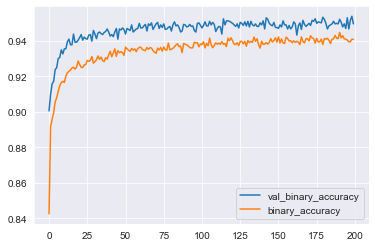

In [109]:
loss[['val_binary_accuracy', 'binary_accuracy']].plot()

<AxesSubplot:>

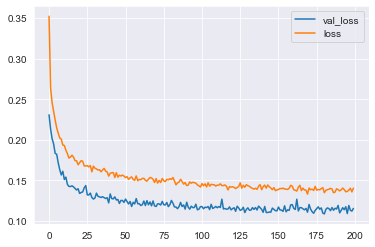

In [110]:
loss[['val_loss', 'loss']].plot()

In [111]:
# maximum accuracy on unseen data

loss['val_binary_accuracy'].max()

0.9538549780845642

In [112]:
# minimum model accuracy on unseen data

loss['val_binary_accuracy'].min()

0.9005445837974548

In [116]:
predictions = (network.predict(X_test) > 0.5).astype('int32')

In [117]:
predictions

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
print(confusion_matrix(y_test, predictions), '\n')
print('\n')
print( classification_report(y_test, predictions))

[[1602  112]
 [  64 1711]] 



              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1714
           1       0.94      0.96      0.95      1775

    accuracy                           0.95      3489
   macro avg       0.95      0.95      0.95      3489
weighted avg       0.95      0.95      0.95      3489

